In [2]:
import pandas as pd
df = pd.read_csv("dataset_tomat.csv")
df

,Harga,Hari,Cuaca,Promo,Total_Penjualan
0,8000,Senin,Cerah,Tidak,92
1,7500,Senin,Berawan,Tidak,88
2,12000,Selasa,Hujan,Ya,105
3,9500,Selasa,Mendung,Tidak,70
4,7000,Rabu,Cerah,Tidak,98
...,...,...,...,...,...
90,7000,Jumat,Mendung,Tidak,80
91,6500,Sabtu,Cerah,Ya,178
92,11200,Sabtu,Cerah,Tidak,130
93,11500,Minggu,Cerah,Tidak,138


In [3]:
df.shape

(95, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Harga            95 non-null     int64 
 1   Hari             95 non-null     object
 2   Cuaca            95 non-null     object
 3   Promo            95 non-null     object
 4   Total_Penjualan  95 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 3.8+ KB


In [5]:
df.isna().sum()

Harga              0
Hari               0
Cuaca              0
Promo              0
Total_Penjualan    0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

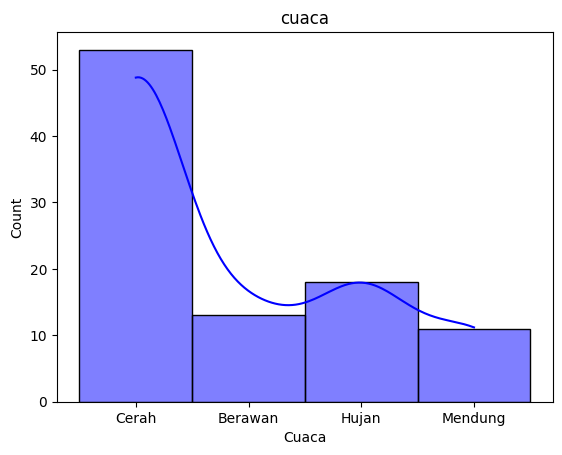

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df["Cuaca"], kde=True, color="blue")
plt.title("cuaca")
plt.show

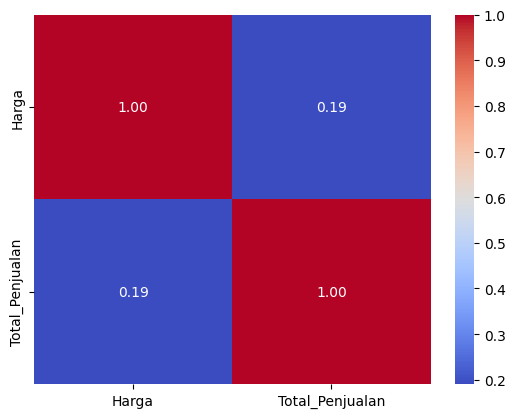

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

kolom_angka = df[["Harga","Total_Penjualan"]]
corr = kolom_angka.corr()

sns.heatmap(corr, annot=True,  fmt=".2f", cmap="coolwarm")
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X = df[["Harga","Hari","Cuaca","Promo"]]
y = df["Total_Penjualan"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

numeric_columns = ["Harga"]
categorical_columns =["Hari","Cuaca", "Promo"]

preprocessing = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(), numeric_columns),
        ("ohe", OneHotEncoder(), categorical_columns)
    ]
)

model_linear = Pipeline(
    steps=[
        ("preprocessing", preprocessing),
        ("model", LinearRegression())
    ]
)

model_linear.fit(X_train, y_train)
y_pred = model_linear.predict(X_test)
print("R2 Score :", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))

R2 Score : 0.9064850021518649
MAE : 8.17094197677559
MSE : 108.13545900754994


In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X = df[["Harga","Hari","Cuaca","Promo"]]
y = df["Total_Penjualan"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

numeric_columns = ["Harga"]
categorical_columns =["Hari","Cuaca", "Promo"]

preprocessing = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(), numeric_columns),
        ("ohe", OneHotEncoder(), categorical_columns)
    ]
)

model_tree = Pipeline(
    steps=[
        ("preprocessing", preprocessing),
        ("model", DecisionTreeRegressor(
            random_state=42,
            max_depth=6
        ))
    ]
)

model_tree.fit(X_train, y_train)
y_pred = model_tree.predict(X_test)
print("R2 Score :", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))

R2 Score : 0.8056833077807589
MAE : 9.463157894736844
MSE : 224.69684210526316


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X = df[["Harga","Hari","Cuaca","Promo"]]
y = df["Total_Penjualan"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

numeric_columns = ["Harga"]
categorical_columns =["Hari","Cuaca", "Promo"]

preprocessing = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(), numeric_columns),
        ("ohe", OneHotEncoder(), categorical_columns)
    ]
)

model_rf = Pipeline(
    steps=[
        ("preprocessing", preprocessing),
        ("model", RandomForestRegressor(
            random_state=42,
            max_depth=6
        ))
    ]
)

model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
print("R2 Score :", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))

R2 Score : 0.9560047462882524
MAE : 5.137646580891024
MSE : 50.87362523388349


In [11]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_rf, X_train, y_train, cv=5, scoring="r2")
print("Scores :", scores)
print("Mean score :", scores.mean())

Scores : [0.90913251 0.94418754 0.80803734 0.93681458 0.91498963]
Mean score : 0.9026323194235084


In [12]:
import joblib

joblib.dump(model_rf, "model_rf.joblib")

['model_rf.joblib']

In [13]:
import pandas as pd
import joblib

model_rf = joblib.load("model_rf.joblib")
data_baru = pd.DataFrame([[5000,"Selasa","Hujan","Tidak"]],columns=["Harga","Hari","Cuaca","Promo"])
prediksi = model_rf.predict(data_baru)[0]
print(f"Model memprediksi total penjualannya {prediksi:.0f}")

Model memprediksi total penjualannya 82


In [ ]:
import joblib 

joblib.dump